In [1]:
import requests
from bs4 import BeautifulSoup
import bs4
import pandas as pd
import numpy as np
from IPython.display import Image
pd.options.display.max_rows = 5000 #(设定能显示的行数)

### Go to rightmove.co.uk, search rental properties in Maidstone, and copy paste to replace the 'url' below

In [2]:
link = 'https://www.rightmove.co.uk/property-for-sale/find.html?searchType=SALE&locationIdentifier=REGION%5E70387&insId=1&radius=3.0&minPrice=&maxPrice=&minBedrooms=&maxBedrooms=3&displayPropertyType=flats&maxDaysSinceAdded=&_includeSSTC=on&sortByPriceDescending=&primaryDisplayPropertyType=&secondaryDisplayPropertyType=&oldDisplayPropertyType=&oldPrimaryDisplayPropertyType=&newHome=&auction=false'

acton_park_2beds_link = 'https://www.rightmove.co.uk/property-for-sale/find.html?locationIdentifier=REGION%5E70387&maxBedrooms=2&minBedrooms=2&radius=0.25&propertyTypes=flat&primaryDisplayPropertyType=flats&includeSSTC=false&mustHave=&dontShow=&furnishTypes=&keywords='

In [3]:
bdrooms = []
addresses = []
rent = []

for start in range(0,480,24):
    url = acton_park_2beds_link.format(start)
    r = requests.get(url)
    soup = BeautifulSoup(r.text, "html.parser")
    
    for num in soup.find_all('h2', class_= 'propertyCard-title'):
        bdrooms.append(num.text.strip())
        
    for add in soup.find_all('address', class_="propertyCard-address"):
        for meta in add:
            for loc in meta:
                if type(loc) is bs4.element.NavigableString:
                    addresses.append(loc)
                    
    for pc in soup.find_all('div', 'propertyCard-priceValue'):
        rent.append(pc.string)

In [4]:
print(len(bdrooms))
print(bdrooms[:5])
print(len(addresses))
print(addresses[:5])
print(len(rent))
print(rent[:5])

500
['2 bedroom maisonette for sale', '2 bedroom flat for sale', '2 bedroom apartment for sale', '2 bedroom flat for sale', '2 bedroom flat for sale']
500
['Canada Road, LONDON', 'The Green, London, W3', 'One West Point, Portal West, W3', 'The Green, London, W3', 'The Green, London, W3']
500
['£425,000        ', '£950,000        ', '£915,000        ', '£900,000        ', '£850,000        ']


In [5]:
acton_park_2beds = pd.DataFrame({'bdrooms':pd.Series(bdrooms), 'address':pd.Series(addresses), 'price':pd.Series(rent)})
acton_park_2beds.tail()

,bdrooms,address,price
495,2 bedroom property for sale,"Shalimar Road, London, W3","£675,000"
496,2 bedroom flat for sale,"Perryn Road, London","£665,000"
497,2 bedroom apartment for sale,"Acton Town Hall Apartments, London, W3","£650,000"
498,2 bedroom apartment for sale,"One West Point, Victoria Road, North Acton, W3","£650,000"
499,2 bedroom apartment for sale,"One West Point, North Acton, W3","£620,000"


In [6]:
acton_park_2beds

,bdrooms,address,price
0,2 bedroom maisonette for sale,"Canada Road, LONDON","£425,000"
1,2 bedroom flat for sale,"The Green, London, W3","£950,000"
2,2 bedroom apartment for sale,"One West Point, Portal West, W3","£915,000"
3,2 bedroom flat for sale,"The Green, London, W3","£900,000"
4,2 bedroom flat for sale,"The Green, London, W3","£850,000"
5,2 bedroom flat for sale,"The Green, London, W3","£800,000"
6,2 bedroom apartment for sale,"One West Point, Portal Way, W3","£799,950"
7,2 bedroom flat for sale,"One West Point, Acton, W3","£799,950"
8,2 bedroom flat for sale,"The Green, London, W3","£750,000"
9,2 bedroom apartment for sale,"One West Point, Portal Way, W3","£740,000"


In [8]:
acton_2beds = acton_park_2beds

In [9]:
acton_2beds = acton_2beds.dropna()
acton_2beds.tail()

,bdrooms,address,price
495,2 bedroom property for sale,"Shalimar Road, London, W3","£675,000"
496,2 bedroom flat for sale,"Perryn Road, London","£665,000"
497,2 bedroom apartment for sale,"Acton Town Hall Apartments, London, W3","£650,000"
498,2 bedroom apartment for sale,"One West Point, Victoria Road, North Acton, W3","£650,000"
499,2 bedroom apartment for sale,"One West Point, North Acton, W3","£620,000"


In [10]:
acton_2beds['price'] = [int(''.join(filter(str.isdigit, i))) for i in acton_2beds['price']]
acton_2beds.tail()

,bdrooms,address,price
495,2 bedroom property for sale,"Shalimar Road, London, W3",675000
496,2 bedroom flat for sale,"Perryn Road, London",665000
497,2 bedroom apartment for sale,"Acton Town Hall Apartments, London, W3",650000
498,2 bedroom apartment for sale,"One West Point, Victoria Road, North Acton, W3",650000
499,2 bedroom apartment for sale,"One West Point, North Acton, W3",620000


In [11]:
acton_2beds.describe()

,price
count,500.000000
mean,730443.800000
std,100412.402884
min,275000.000000
25%,680000.000000
50%,699950.000000
75%,799950.000000
max,950000.000000


In [ ]:
# df[df['ids'].str.contains("ball")]

In [12]:
acton_2beds = acton_2beds.drop_duplicates()

print(acton_2beds.address.unique())

print(acton_2beds.price.describe())

['Canada Road, LONDON' 'The Green, London, W3'
 'One West Point, Portal West, W3' 'One West Point, Portal Way, W3'
 'One West Point, Acton, W3' '6 Portal Way, North Acton, London'
 'Kings Court, King Street, Ealing' 'Emanuel Avenue, W3'
 'Emanuel Avenue, London' 'Emanuel Ave, W3' 'Birkbeck Road, London, W3'
 'Shalimar Road, London, W3' 'Perryn Road, London'
 'Acton Town Hall Apartments, London, W3'
 'One West Point, Victoria Road, North Acton, W3'
 'One West Point, North Acton, W3' 'Horn Lane, Acton, London, W3'
 'Church Road, Acton, W3' 'Fletcher Road, London, W4']
count        27.000000
mean     699251.851852
std      140251.134290
min      275000.000000
25%      657500.000000
50%      695000.000000
75%      774975.000000
max      950000.000000
Name: price, dtype: float64


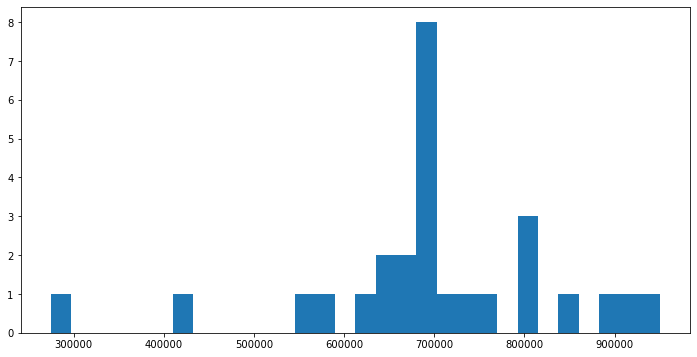

In [14]:
acton_2beds.price.hist(figsize=(12,6),grid=False, bins=30);